In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path='/content/drive/MyDrive/Colab Notebooks/MLOM/Assignments/Assignment_01'

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#all train images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

#flow tarining images in batches of 128 using train_datagen generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = (124,124),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = 'True')


#apply predefined specification to test dataset
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = (124, 124),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = 'True')

Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [24]:
#define the model
model = tf.keras.models.Sequential([
    #Note the input shape is the desired size of the image 300*300 with 3 bytes color
    #This is the first convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='sigmoid', strides=1, input_shape=(124,124,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    #The second convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    #50 neuron hidden layer
    tf.keras.layers.Dense(50, activation='relu'),

    #5 output neuron. It will contain a value from
    tf.keras.layers.Dense(5, activation='softmax'),

])

In [ ]:
#complie the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [23]:
#to get sumamry of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 122, 122, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 61, 61, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 29, 29, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 13456)             0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [ ]:
#fit the model to train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
17/17 [==============================] - 5s 253ms/step - loss: 1.8776 - accuracy: 0.2447 - val_loss: 1.5934 - val_accuracy: 0.2656
Epoch 2/10
17/17 [==============================] - 3s 197ms/step - loss: 1.5892 - accuracy: 0.2677 - val_loss: 1.5946 - val_accuracy: 0.2656
Epoch 3/10
17/17 [==============================] - 4s 216ms/step - loss: 1.5929 - accuracy: 0.2677 - val_loss: 1.5841 - val_accuracy: 0.2656
Epoch 4/10
17/17 [==============================] - 3s 195ms/step - loss: 1.5913 - accuracy: 0.2486 - val_loss: 1.5894 - val_accuracy: 0.2656
Epoch 5/10
17/17 [==============================] - 3s 196ms/step - loss: 1.5862 - accuracy: 0.2677 - val_loss: 1.5906 - val_accuracy: 0.2656
Epoch 6/10
17/17 [==============================] - 3s 196ms/step - loss: 1.5866 - accuracy: 0.2677 - val_loss: 1.5827 - val_accuracy: 0.2656
Epoch 7/10
17/17 [==============================] - 4s 202ms/step - loss: 1.5840 - accuracy: 0.2677 - val_loss: 1.5823 - val_accuracy: 0.2656
Epoch 

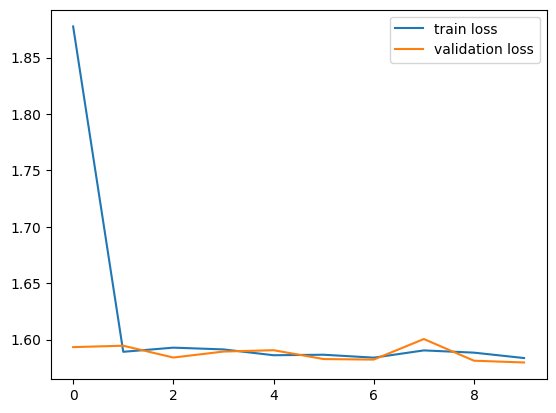

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

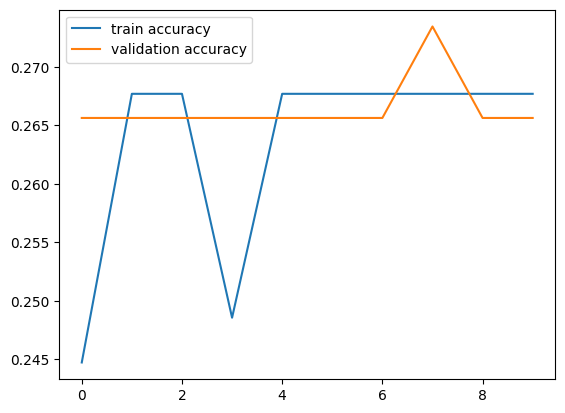

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')